In [12]:
#Problem 1 A: 
def EulerSieve1(N):
    L=[]
    for i in range(2,N+1):
        L.append(i)
    P=2
    L1=[]
    L2=[]
    while P*P<N:
        for X in L:
            if X>=P and X<=N/P:
                L1.append(X)
        L2=[y*P for y in L1]
        L=[x for x in L if x not in L2]
        P+=1
        L1=[]
    return L

In [13]:
# Problem 1 A input:
EU=EulerSieve1(27)
print(EU)

[2, 3, 5, 7, 11, 13, 17, 19, 23]


In [14]:
# Problem 1 B:
def EulerSieve2(N):
    dfltList=[0,0]+[1]*(N-1)
    L=dfltList[:]
    P=2
    L1=dfltList[:]
    L2=[]
    while P*P<=N:
        for idx,value in enumerate(L):
            if idx>=P and idx<=N/P:
                L1[idx]=0
        L2=dfltList[:]
        for yi,y in enumerate(L1):
            if y ==0 and yi>1 and P*yi<=N:
                L2[P*yi]=0
        for ki,k in enumerate(L2):
            if k==0:
                L[ki]=0
        P+=1
        L1=dfltList[:]
    return L[1:]

In [15]:
# Problem 1 B input:
EU2=EulerSieve2(27)
print(EU2)

[0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]


In [25]:
# Problem 2:

%matplotlib inline
from matplotlib import pyplot as plt
class Polygons:
    def checkValidPolygon(self,P):
        return len(P)==2 and len(P[0]) == len(P[1])
    def ConnectMidpoints(self,P):
        
        if self.checkValidPolygon(P):
            Px=P[0]
            Py=P[1]
            numOfPts=len(Px)
            Qx=[]
            Qy=[]
            for i in range(numOfPts):
                if i+1 < numOfPts:
                    Qx.append((Px[i]+Px[i+1])/2)
                    Qy.append((Py[i]+Py[i+1])/2)
                else:
                    Qx.append((Px[i]+Px[0])/2)
                    Qy.append((Py[i]+Py[0])/2)
                    
            return [Qx,Qy]
        else:
            raise Exception("Invalid argument.")
    
    # draw is being used for painting the graphs and midpoints.
    def draw(self,K,midPoints=[]):
        xw, yw = zip(*list(zip(K[0]+[K[0][0]],K[1]+[K[1][0]]))) 
        # concatenates to join the last points and zips together x and y elements.
        plt.figure()
        if self.checkValidPolygon(midPoints):
            plt.scatter(midPoints[0],midPoints[1],color='r')
        plt.plot(xw,yw)
        

    def ConvergePolygons(self,P,N):
        if self.checkValidPolygon(P):
            self.draw(P)
            mP=self.ConnectMidpoints(P)
            self.draw(P,mP)
            P=mP
            while N>0:
                self.draw(P)
                midPoints=self.ConnectMidpoints(P)
                if N>1:
                    self.draw(P,midPoints)
                P=midPoints
                N-=1
            plt.show()
        else:
            raise Exception("Invalid argument. The argument should be a list of two lists of equal sizes.")

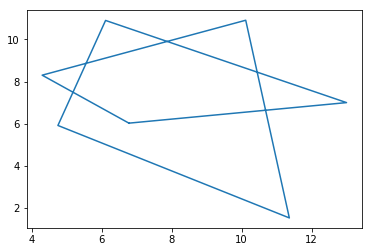

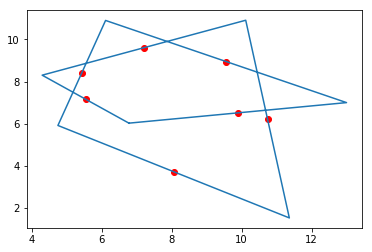

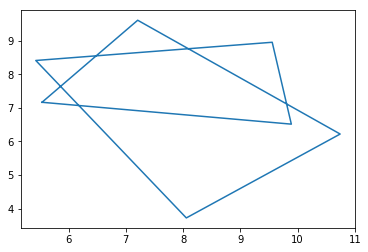

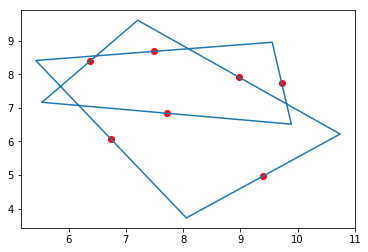

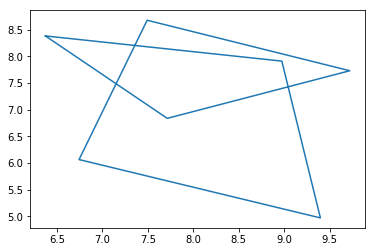

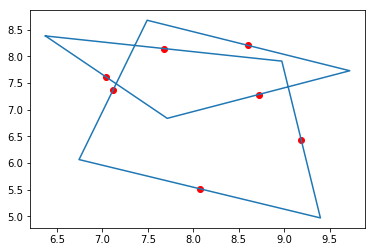

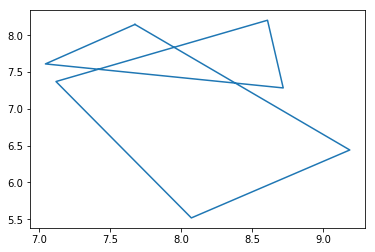

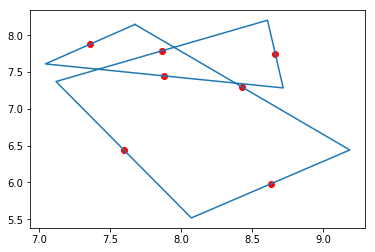

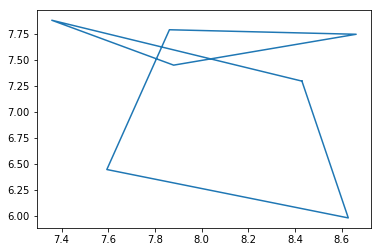

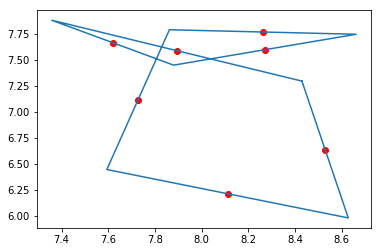

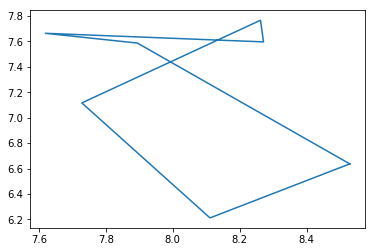

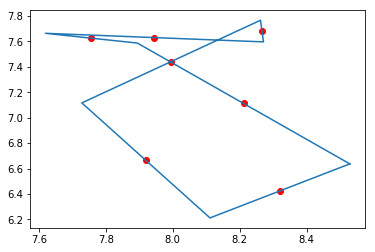

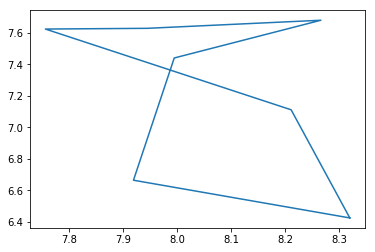

In [27]:
#Problem 2 inputs
A=Polygons()
import math
import numpy as np

Px = list(7+np.array([1,3,5,7,2.5,4,6])*np.cos((10*np.pi*np.arange(1,8)/7)))
Py = list(7+np.array([1,3,5,7,2.5,4,6])*np.sin((10*np.pi*np.arange(1,8)/7)))
K=[Px,Py]
A.ConvergePolygons(K,6)